<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Student-Name:-Renjie-Meng" data-toc-modified-id="Student-Name:-Renjie-Meng-1">Student Name: Renjie Meng</a></span></li><li><span><a href="#Student-ID:-877396" data-toc-modified-id="Student-ID:-877396-2">Student ID: 877396</a></span></li><li><span><a href="#COMP20008-EDP-18S1-Phase-1" data-toc-modified-id="COMP20008-EDP-18S1-Phase-1-3">COMP20008 EDP 18S1 Phase 1</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-3.1">Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-3.2">Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3.3">Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-3.4">Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-3.5">Question 5</a></span></li><li><span><a href="#Question-6" data-toc-modified-id="Question-6-3.6">Question 6</a></span></li><li><span><a href="#Question-7" data-toc-modified-id="Question-7-3.7">Question 7</a></span></li><li><span><a href="#Question-8" data-toc-modified-id="Question-8-3.8">Question 8</a></span></li><li><span><a href="#Question-9" data-toc-modified-id="Question-9-3.9">Question 9</a></span></li><li><span><a href="#Question-10" data-toc-modified-id="Question-10-3.10">Question 10</a></span></li></ul></li></ul></div>

# Student Name: Renjie Meng 

# Student ID: 877396

# COMP20008 EDP 18S1 Phase 1 

In [1]:
#Any general code that you want to reuse in the following answers
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import parallel_coordinates


#Reading the data into a dataframe.
cleanJan = pd.read_csv('clean-january.csv',encoding = 'ISO-8859-1')
tripDistance = cleanJan['trip_distance']

## Question 1

In [2]:
#Answer to 1

# This function takes trip_distance as an argument. 
# A short trip has distance 0 < d < 3, otherwise it is not.
# Returns 1 for a short trip, 0 for otherwise.
def is_short_trip(tripDistance):
    if 0<tripDistance<3:
        return 1
    else: 
        return 0
    
# check each trip distance whether it is a short trip or not
# store the values in a list then convert into a series
Short_Trip=[];
for distance in tripDistance:
    Short_Trip.append(is_short_trip(distance))
Short_Trip_Series = pd.Series(Short_Trip)

# create new data frame
newDataFrame =cleanJan[['trip_distance', 'passenger_count', 'payment_amount', 'duration']]
pd.DataFrame.insert(newDataFrame, 0, 'Short_Trip', Short_Trip_Series)
newDataFrame = newDataFrame.rename(index = str, columns = {'trip_distance':'Trip_distance', 
                                            'passenger_count':'Passenger_count', 
                                            'payment_amount': 'Payment_amouunt',
                                            'duration': 'Duration'})

# calculate the percentage of short trips
percentageOfShortTrips = (newDataFrame.iloc[: ,0].sum())/(newDataFrame.iloc[:,0].count())

# print out the percentage of short trips
print("Question1\n%% of short trips=%.1f\n***"%(100*percentageOfShortTrips))

Question1
% of short trips=71.3
***


## Question 2

In [3]:
#Answer to 2
# get the median of TripDistance and TripDuration
meadianTripDistance = tripDistance.median()
meadianTripDuration = cleanJan['duration'].median()
# print out the median trip distance and duration
print("Question 2 median trip distance\nJanuary: %.1f\n***"%meadianTripDistance)
print("Question 2 median trip duration\nJanuary: %.1f\n***"%meadianTripDuration)

Question 2 median trip distance
January: 1.8
***
Question 2 median trip duration
January: 11.0
***


## Question 3

In [4]:
#Answer to 3

# This function takes a float tripDistance as an argument
# normal distance is 1.2<= d <=4.5
# Returns 1 for normal distance, 0 for otherwise

def is_distance_normal(tripDistance):
    if 1.2<=tripDistance<=4.5:
        return 1
    else:
        return 0

# count the trip distance which fall in the range of normal (1.2<=d<=4.5)
normalCount = 0
for distance in tripDistance:
    normalCount += is_distance_normal(distance)

# calculate the percetage of abnormal trip distance
percentageOfNormalTripDistance = 1 - normalCount/(tripDistance.count())

# print out the percentage of abnormal distance
print("Question 3\n%.1f%% of instances in 'tripdistance' are abnormal! \
(normal range is between 1.2 and 4.5)\n***"%(100*percentageOfNormalTripDistance))

Question 3
42.9% of instances in 'tripdistance' are abnormal! (normal range is between 1.2 and 4.5)
***


## Question 4

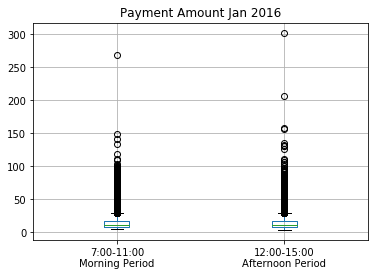

In [5]:
#Answer to 4
#get the puckup datetime index
pickupDateTimeIndex = pd.DatetimeIndex(cleanJan['pickup_datetime'])
#slice pickup datetime index
morningPeriodIndex = pickupDateTimeIndex.indexer_between_time('7:00', '11:00')
afternoonPeriodIndex = pickupDateTimeIndex.indexer_between_time('12:00', '15:00')
#slice payment amount with respect to sliced pick up date time
morningPeriod = cleanJan['payment_amount'].iloc[morningPeriodIndex]
afternoonPeriod = cleanJan['payment_amount'].iloc[afternoonPeriodIndex]
#plot two boxplot toghther
plt.clf()
concatInfo = pd.concat([morningPeriod, afternoonPeriod], \
                       axis = 1, keys = ['7:00-11:00\nMorning Period', '12:00-15:00\nAfternoon Period'])
concatInfo.boxplot()
plt.title('Payment Amount Jan 2016')
plt.show()

## Question 5

In [6]:
#Answer to 5
#load start and end time
#set our peak duration
tStart = pd.to_datetime(cleanJan['pickup_datetime'], format = '%d/%m/%y %H:%M')
tEnd = pd.to_datetime(cleanJan['dropoff_datetime'], format = '%d/%m/%y %H:%M')
SevenOClock = pd.to_datetime('07:00', format = '%H:%M')
NineOClock = pd.to_datetime('08:59', format = '%H:%M')

#@parameter tStart, tEnd
#if the 07:00:00<=time<=08:59:00
#return 1
#Otherwise, return 0
def is_peak(tStart, tEnd):
    index_list = []
    if (SevenOClock.time()<=tStart<NineOClock.time()) \
    and (SevenOClock.time()<tEnd<=NineOClock.time()):
        return 1
    else:
        return 0
    
cleanJan['weekday'] = tStart.dt.dayofweek
# 1 for weekdays 0 for weekends
cleanJan['isWeekday'] = [0 if x>4 else 1 for x in cleanJan['weekday']]
    
#check isPeak for all trips in the cleanJan Table
cleanJan['isPeak'] = [ is_peak(tStart[i].time(), tEnd[i].time()) if (cleanJan['isWeekday'][i] ==1)\
                      else 0 for i in range(cleanJan['pickup_datetime'].count())]




#calculate the percentage of peak trip with respect to the total trip
percentageOfPeak = cleanJan['isPeak'].sum()/cleanJan['isPeak'].count();
# print(cleanJan['isPeak'].sum())
print("Question5\n%% of peak hour trips=%.1f\n***"%(percentageOfPeak*100))

Question5
% of peak hour trips=6.2
***


## Question 6

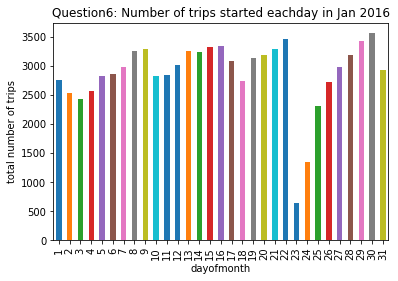

In [7]:
#Answer to 6
# Add a new column day of month
DateTime = pd.to_datetime(cleanJan['pickup_datetime'], format = '%d/%m/%y %H:%M')
cleanJan['dayofmonth'] = [x.day for x in DateTime]

#total number plot by dayofmonth(x axis) and day (y axis)
bygroup = cleanJan.groupby('dayofmonth')
picture = bygroup['dayofmonth'].count().plot(kind='bar')
picture.set_ylabel("total number of trips")
picture.set_xlabel("dayofmonth")
plt.title('Question6: Number of trips started eachday in Jan 2016')
plt.show()

## Question 7

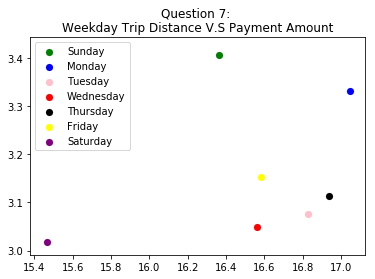

In [8]:
#Answer to 7

#evaluate the mean value for each featuer group by weekday
tStart = pd.to_datetime(cleanJan['pickup_datetime'], format = "%d/%m/%y %H:%M")
cleanJan['weekday'] = tStart.dt.dayofweek
bygroup = cleanJan.groupby('weekday').mean()
#Scatter plot 
# From Sunday to Saturday refelct to different color
fig, ax = plt.subplots()
label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colorlist = ['blue','pink', 'red', 'black', 'yellow', 'purple', 'green']
daylist = [6,0,1,2,3,4,5]

for i in daylist:

    x = bygroup['payment_amount'][i]
    y = bygroup['trip_distance'][i]
    l = label[i]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=colorlist[i])

ax.legend()
plt.title('Question 7: \nWeekday Trip Distance V.S Payment Amount')
plt.show()

## Question 8 

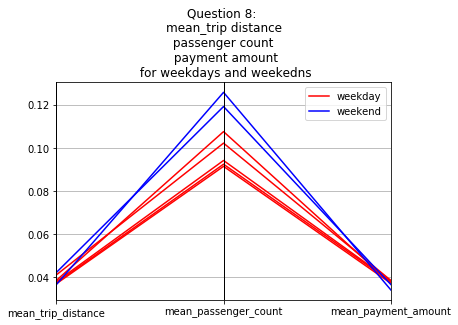

In [9]:
#Answer to 8

# @parameters: DF(DataFrame), colName(str)
# return nomalised colName Field values
def normalising(DF, colName):
    max = DF[colName].max()
    min = DF[colName].min()
    new = [(x-min)/(max-min) for x in DF[colName]]
    return new
#  normalise into the range [0, 1]
cleanJan['mean_trip_distance'] = normalising(cleanJan,'trip_distance')
cleanJan['mean_passenger_count'] = normalising(cleanJan,'passenger_count' )
cleanJan['mean_payment_amount'] = normalising(cleanJan,'payment_amount' )

# The day indicates from 0: Monday : 0, ..., Sunday : 6
tStart = pd.to_datetime(cleanJan['pickup_datetime'], format = "%d/%m/%y %H:%M")
cleanJan['weekday'] = tStart.dt.dayofweek
bygroupMean = cleanJan.groupby('weekday').mean()
bygroupMean['isweekend'] = ['weekday', 'weekday', 'weekday', 'weekday', 'weekday', 'weekend', 'weekend']
df = bygroupMean[['mean_trip_distance', 'mean_passenger_count', 'mean_payment_amount', 'isweekend']]

# plot parallel coordinate with legend red-weekends blue-weekdays
picture8 = parallel_coordinates(df, 'isweekend', color = ['red', 'blue'])
plt.title("Question 8: \nmean_trip distance\n passenger count \n payment amount\n for weekdays and weekedns" )
plt.show()

## Question 9 

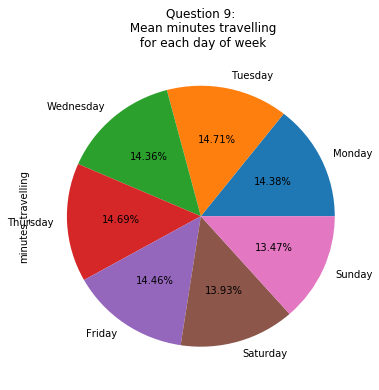

In [10]:
#Answer to 9

#@Parameters: rawData(DataFrame), startCol(str), endCol(str)
#@return trip duration in minutes
def evaluate_duration(rawData,startCol, endCol):
    tStart = pd.to_datetime(rawData[startCol], format = '%d/%m/%y %H:%M')
    tEnd   = pd.to_datetime(rawData[endCol], format = '%d/%m/%y %H:%M')
    return (tEnd - tStart).dt.total_seconds()/60


# Calculate the mean duration for each day of week
tStart = pd.to_datetime(cleanJan['pickup_datetime'], format = "%d/%m/%y %H:%M")
cleanJan['weekday'] = tStart.dt.dayofweek
cleanJan['Duration'] = evaluate_duration(cleanJan, 'pickup_datetime', 'dropoff_datetime')
cleanJan['minutes_travelling'] = [cleanJan['Duration'][i]*\
                                 cleanJan['passenger_count'][i] for i in range(cleanJan['Duration'].count())]
bygroup = cleanJan.groupby('weekday').mean()


#Pie chart plot
label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
picture9 = bygroup.plot.pie(y = 'minutes_travelling',figsize = (6,6), legend = False, labels = label,\
                            autopct = '%1.2f%%')
plt.title("Question 9:\n Mean minutes travelling\n for each day of week")
plt.show()

## Question 10 

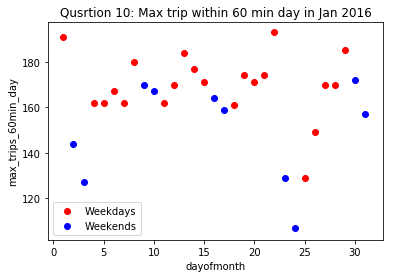

In [11]:
#Answer to 10

#@Parameters: dayTrips
#@return max trips within 60mins of one day
def count_60_max_trips(dayTrips):
    # convert to datetime format
    tStart = pd.to_datetime(dayTrips['pickup_datetime'], format = '%d/%m/%y %H:%M')
    tEnd = pd.to_datetime(dayTrips['dropoff_datetime'], format = '%d/%m/%y %H:%M')
    max_count = 0
    # iterate with the correct index range 
    index_max_plus_one = dayTrips.index.max()+1
    # initialize the oldTrip to none
    oldStartTrip = None
    # choose start trip one by one but skip the trip with same start time for efficiency
    for j in range(dayTrips.index.min(), index_max_plus_one):
        startTrip =  tStart[j]
        if oldStartTrip == startTrip:
            pass
        else:
            count = 0
            # iterate trip after start trip one by one
            for i in range(j, index_max_plus_one):
                start   = tStart[i]
                end   = tEnd[i]
                # the trip should begin after start trip and end on the same day
                if start >= startTrip and 0<=(start - startTrip).total_seconds()/60<=60:
                    gap = (end - startTrip).total_seconds()/60
                    # the gap between the trip and start trip should be within 60 mins
                    if 0<=gap<60 and end.day == startTrip.day:
                        count+=1
                else:
                    break
            # update the maximun
            if count > max_count:
                  max_count = count
        oldStartTrip = startTrip
    return max_count



#@Parameters: groupbyObject
#@return 1 if weekday else 0 for weekends
def is_weekday(groupbyObject):
    index = groupbyObject.index.min()
    day =  pd.to_datetime(groupbyObject['pickup_datetime'], format = '%d/%m/%y %H:%M')[index].dayofweek
    return (0 if day>4 else 1)



# Add a new column day of month
tStart = pd.to_datetime(cleanJan['pickup_datetime'], format = '%d/%m/%y %H:%M')
cleanJan['dayofmonth'] = [x.day for x in tStart]
bygroup = cleanJan.groupby('dayofmonth')

# initialize three main feature for ploting 
dayofmonth = []
weekday = []
max_trips_60min_day = []

# update dayofmonth to get day
for key,item in bygroup:
    dayofmonth.append(key)
    
# iterate through every day    
for i in range(1, 32):
    max_trips_60min_day.append(count_60_max_trips(bygroup.get_group(i)))
    weekday.append(is_weekday(bygroup.get_group(i)))


    
# Scatter plot
# convert three main features into df
DF_max_trips_60min_day = pd.DataFrame({'dayofmonth':dayofmonth, 'max_trips_60min_day': max_trips_60min_day, 'isweekday': weekday})
weekdays = DF_max_trips_60min_day[DF_max_trips_60min_day['isweekday']==1]
weekends = DF_max_trips_60min_day[DF_max_trips_60min_day['isweekday']==0]

# plot weekdays and weekends max_trips_60min_day respectively
ax = plt.scatter(weekdays['dayofmonth'], weekdays['max_trips_60min_day'], color = 'red', label = 'Weekdays')
ax = plt.scatter(weekends['dayofmonth'], weekends['max_trips_60min_day'], color = 'blue', label = 'Weekends')

# Add feature on plot
plt.xlabel('dayofmonth')
plt.ylabel('max_trips_60min_day')
plt.title("Qusrtion 10: Max trip within 60 min day in Jan 2016")
plt.legend()
plt.show()